In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

In [3]:
df_mouse_study_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
df_mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
mouse_count = len(df_mouse_study_results["Mouse ID"].unique())
mouse_count

249

In [5]:
df_mouse_study_duplicates = df_mouse_study_results[df_mouse_study_results.duplicated(["Mouse ID", "Timepoint"], keep=False)]
df_mouse_study_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
g989 = df_mouse_study_results.loc[df_mouse_study_results["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
df_mouse_study_clean = df_mouse_study_results.loc[df_mouse_study_results["Mouse ID"] != "g989"]
df_mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
mouse_count_clean = len(df_mouse_study_clean["Mouse ID"].unique())
mouse_count_clean

248

In [9]:
mean_tumor_size_by_regimen = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).mean() ["Tumor Volume (mm3)"]

In [10]:
median_tumor_size_by_regimen = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).median() ["Tumor Volume (mm3)"]

In [11]:
variance_tumor_size_by_regimen = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).var() ["Tumor Volume (mm3)"]

In [12]:
std_dev_tumor_size_by_regimen = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).std() ["Tumor Volume (mm3)"]

In [13]:
std_err_tumor_size_by_regimen = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).sem() ["Tumor Volume (mm3)"]

In [14]:
df_summary_statistics_tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean_tumor_size_by_regimen,
                                     "Median Tumor Volume": median_tumor_size_by_regimen,
                                     "Tumor Volume Variance": variance_tumor_size_by_regimen,
                                      "Tumor Volume Std. Dev": std_dev_tumor_size_by_regimen,
                                      "Tumor Volume Std. Err.": std_err_tumor_size_by_regimen,
                                     })

df_summary_statistics_tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
df_summary_statistics_tumor_volume_agg = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
df_summary_statistics_tumor_volume_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

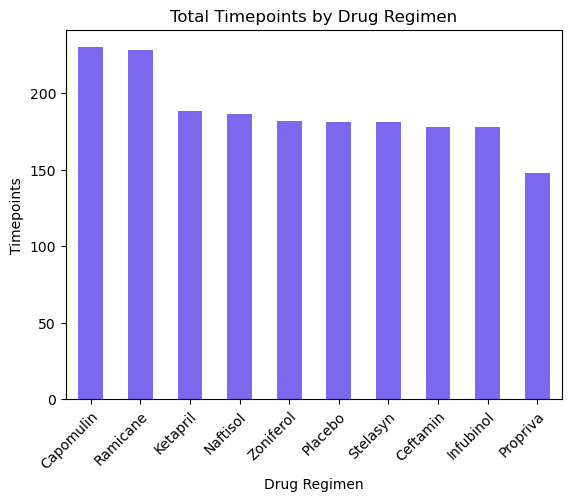

In [16]:
df_timepoints_by_regimen = df_mouse_study_clean.groupby(df_mouse_study_clean["Drug Regimen"]).count()["Timepoint"]
df_timepoints_by_regimen = df_timepoints_by_regimen.sort_values(ascending=False)
timepoint_labels = df_timepoints_by_regimen.index
figure1 = df_timepoints_by_regimen.plot(kind="bar", title="Total Timepoints by Drug Regimen", xlabel="Drug Regimen", ylabel="Timepoints", color="mediumslateblue")
figure1.set_xticklabels(timepoint_labels, rotation=45, rotation_mode="anchor", ha="right")
plt.show(figure1)

In [17]:
no_of_drug_regimens = np.arange(len(df_timepoints_by_regimen))
no_of_timepoints = df_timepoints_by_regimen.values

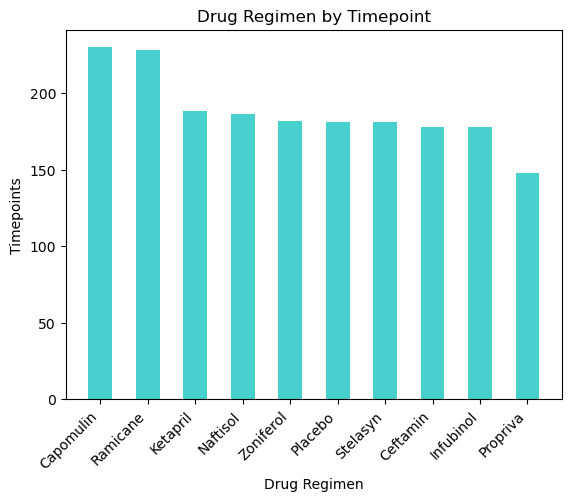

In [18]:
figure2 = plt.bar(no_of_drug_regimens, no_of_timepoints, color="mediumturquoise", width=0.5)
plt.title("Drug Regimen by Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(ticks=no_of_drug_regimens, labels=df_timepoints_by_regimen.index, rotation=45, ha="right")
plt.show(figure2)

In [19]:
df_sex = df_mouse_study_clean.drop(["Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"],axis=1)
df_sex = df_sex.drop_duplicates(subset="Mouse ID")
df_sex = df_sex.groupby(df_sex["Sex"]).count()["Mouse ID"]

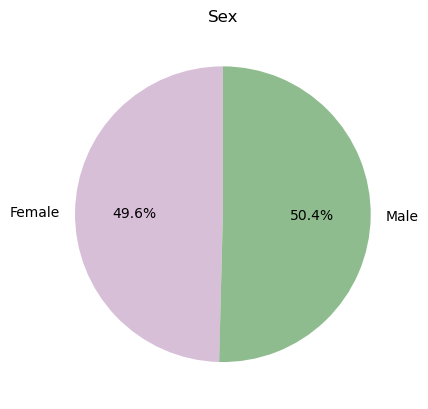

In [20]:
figure3 = df_sex.plot(kind="pie", ylabel="", title="Sex", autopct="%1.1f%%", colors = ["thistle", "darkseagreen"], startangle=90)
plt.show(figure3)

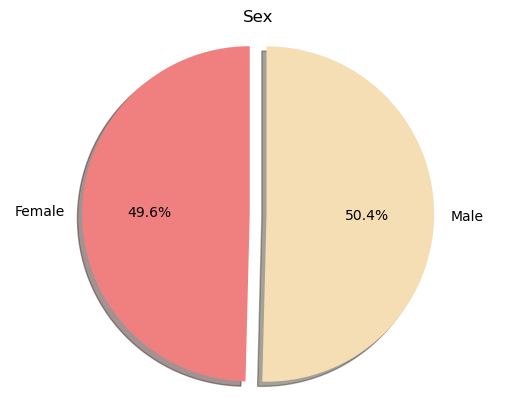

In [21]:
sex_labels = ["Female", "Male"]
sex_colors = ["lightcoral", "wheat"]
sex_values = df_sex.values
sex_explode = [0.1,0]
figure4 = plt.pie(sex_values, labels=sex_labels, colors=sex_colors, autopct="%1.1f%%", startangle=90, explode=sex_explode, shadow=True)
plt.axis("equal")
plt.title("Sex")
plt.show(figure4)

In [22]:
final_timepoint = df_mouse_study_clean.groupby(["Mouse ID"]).max()["Timepoint"]
final_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [33]:
df_final_timepoint = pd.merge(df_mouse_study_clean, final_timepoint, on=["Mouse ID", "Timepoint"], how="right")
df_final_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [119]:
capomulin_final_timepoint = df_final_timepoint.loc[df_final_timepoint["Drug Regimen"] == "Capomulin"]
ramicane_final_timepoint = df_final_timepoint.loc[df_final_timepoint["Drug Regimen"] == "Ramicane"]
infubinol_final_timepoint = df_final_timepoint.loc[df_final_timepoint["Drug Regimen"] == "Infubinol"]
ceftamin_final_timepoint = df_final_timepoint.loc[df_final_timepoint["Drug Regimen"] == "Ceftamin"]

In [120]:
treatment_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [121]:
capomulin_tumor_volume_data = [x for x in capomulin_final_timepoint["Tumor Volume (mm3)"]]
ramicane_tumor_volume_data = [x for x in ramicane_final_timepoint["Tumor Volume (mm3)"]]
infubinol_tumor_volume_data = [x for x in infubinol_final_timepoint["Tumor Volume (mm3)"]]
ceftamin_tumor_volume_data = [x for x in ceftamin_final_timepoint["Tumor Volume (mm3)"]]

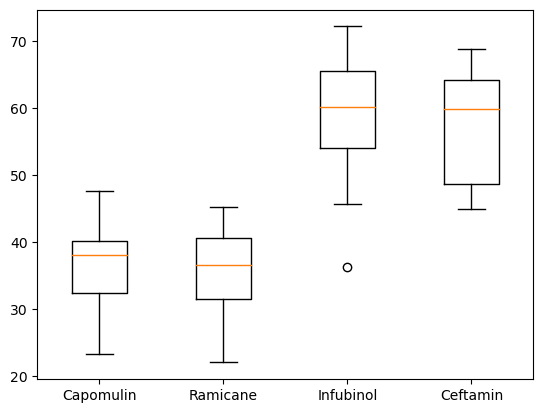

In [122]:
top_treatments_tumor_volume_data = [capomulin_tumor_volume_data, ramicane_tumor_volume_data, infubinol_tumor_volume_data, ceftamin_tumor_volume_data]
plt.boxplot(top_treatments_tumor_volume_data, labels = treatment_labels)
plt.show()

In [100]:
m601 = df_mouse_study_clean.loc[df_mouse_study_clean["Mouse ID"] == "m601"]
m601_tumor = m601["Tumor Volume (mm3)"].values
m601_timepoint = m601["Timepoint"].values
m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


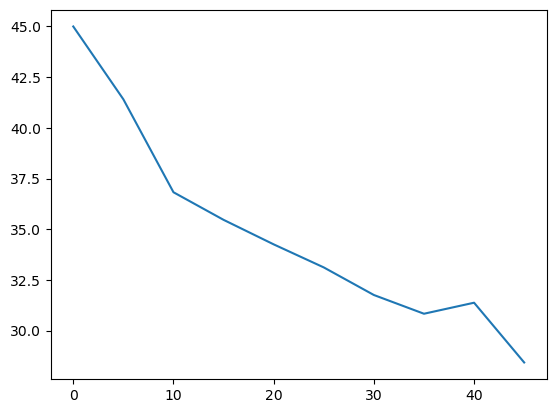

In [106]:
figure_m601 = plt.plot(m601_timepoint,m601_tumor)
plt.show(figure_m601)

In [126]:
df_capomulin_complete = df_mouse_study_clean.loc[df_mouse_study_clean["Drug Regimen"] == "Capomulin"]
capomulin_ave_tumor = df_capomulin_complete.groupby(df_capomulin_complete["Mouse ID"]).mean()["Tumor Volume (mm3)"]
capomulin_weight = df_capomulin_complete.groupby(df_capomulin_complete["Mouse ID"]).mean()["Weight (g)"]

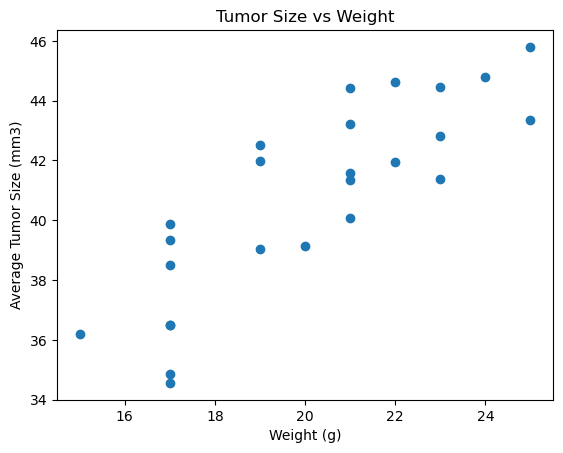

In [128]:
figure5 = plt.scatter(capomulin_weight, capomulin_ave_tumor)
plt.title("Tumor Size vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.show(figure5)